<a href="https://colab.research.google.com/github/Fdogbe1/Capstone/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os

folder_path = "/content/drive/My Drive/Capstone"

# Listing all files in my Capstone folder
files = os.listdir(folder_path)
print(files)


['ebd_US_rosgoo_199501_202501_relDec-2024.txt', 'ebd_US_amwpel_199501_202501_relDec-2024.txt', 'ebd_US_balori_199501_202501_relDec-2024.txt', 'ebd_US_rthhum_relDec-2024.txt', 'ebd_US_mallar2_199501_202501_relDec-2024.txt']


In [ ]:
import pandas as pd
import glob

# Defining the folder path
folder_path = "/content/drive/My Drive/Capstone"

# Getting a list of all .txt files in my folder
file_list = glob.glob(folder_path + "/*.txt")

# Reading and concatenating all text files
df_list = []
for file in file_list:
    try:
        df = pd.read_csv(file, delimiter="\t", header=None, dtype=str, on_bad_lines='skip', low_memory=False)
        df_list.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenating all DataFrames
combined_df = pd.concat(df_list, ignore_index=True)

# Displaying the first few rows
print("Successfully loaded all files!")
print(combined_df.head())

# Saving the combined DataFrame
combined_df.to_csv("/content/drive/My Drive/Capstone/combined_output.csv", index=False)
print("Concatenated file saved successfully!")



Successfully loaded all files!
                                               0                           1   \
0                        GLOBAL UNIQUE IDENTIFIER            LAST EDITED DATE   
1  URN:CornellLabOfOrnithology:EBIRD:OBS333593933         2016-06-22 18:22:50   
2  URN:CornellLabOfOrnithology:EBIRD:OBS136321732         2014-02-26 21:46:48   
3  URN:CornellLabOfOrnithology:EBIRD:OBS539131197  2024-04-17 21:41:47.133016   
4  URN:CornellLabOfOrnithology:EBIRD:OBS136325189         2014-02-26 21:46:48   

                2         3                 4             5                6   \
0  TAXONOMIC ORDER  CATEGORY  TAXON CONCEPT ID   COMMON NAME  SCIENTIFIC NAME   
1              261   species  avibase-7A24F57F  Ross's Goose     Anser rossii   
2              261   species  avibase-7A24F57F  Ross's Goose     Anser rossii   
3              261   species  avibase-7A24F57F  Ross's Goose     Anser rossii   
4              261   species  avibase-7A24F57F  Ross's Goose     Anser rossii

In [ ]:
import pandas as pd

# Defining the list of states to filter
selected_states = [
    "Alabama", "Arkansas", "Indiana", "Illinois", "Iowa", "Kentucky",
    "Louisiana", "Michigan", "Minn\]sota", "Mississippi", "Missouri",
    "Ohio", "Tennessee", "Wisconsin"
]

# Converting state list to lowercase for case-insensitive comparison
selected_states_lower = [state.lower() for state in selected_states]

# File paths
combined_file_path = "/content/drive/My Drive/Capstone/combined_output.csv"
filtered_file_path = "/content/drive/My Drive/Capstone/filtered_output.csv"

# Initializing counters
total_rows_before = 0
total_rows_after = 0

# Processing the dataset in chunks to handle large files efficiently
with pd.read_csv(combined_file_path, dtype=str, low_memory=False, chunksize=100000, header=1) as reader:

    first_chunk = True  # Flag for writing headers in the output file

    for chunk in reader:
        total_rows_before += len(chunk)  # Count total rows before filtering

        # Ensuring the 'STATE' column exists
        if "STATE" not in chunk.columns:
            raise ValueError(f"Column 'STATE' not found. Available columns: {chunk.columns}")

        # Converting 'State' column to lowercase for case-insensitive matching
        chunk["STATE"] = chunk["STATE"].str.lower()

        # Filtering dataset to only include selected states
        chunk_filtered = chunk[chunk["STATE"].isin(selected_states_lower)]
        total_rows_after += len(chunk_filtered)  # Count total rows after filtering

        # Appending the filtered data to the output file
        chunk_filtered.to_csv(filtered_file_path, mode='a', index=False, header=first_chunk)
        first_chunk = False  # Ensure headers are only written once

# Print total observations before and after filtering
print(f"Total observations before filtering: {total_rows_before}")
print(f"Total observations after filtering: {total_rows_after}")

# Print confirmation message
print(f"Filtered dataset saved successfully at: {filtered_file_path}")




Total observations before filtering: 9741164
Total observations after filtering: 3382801
Filtered dataset saved successfully at: /content/drive/My Drive/Capstone/filtered_output.csv


In [ ]:
import pandas as pd

# Defining file paths
filtered_file_path = "/content/drive/My Drive/Capstone/filtered_output.csv"
final_subset_file_path = "/content/drive/My Drive/Capstone/final_subset.csv"

# Defining the required columns
required_columns = [
    "GLOBAL UNIQUE IDENTIFIER", "COMMON NAME", "SCIENTIFIC NAME", "OBSERVATION COUNT",
    "STATE", "COUNTY", "COUNTY CODE", "LOCALITY ID", "LOCALITY TYPE",
    "LATITUDE", "LONGITUDE", "OBSERVATION DATE"
]

# Loading the filtered dataset
df_filtered = pd.read_csv(filtered_file_path, dtype=str, low_memory=False)

# Ensuring that the required columns exist
missing_cols = [col for col in required_columns if col not in df_filtered.columns]
if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}. Available columns: {df_filtered.columns}")

# Keeping only the required columns
df_subset = df_filtered[required_columns]

# Saved the final subset to a new file in my drive
df_subset.to_csv(final_subset_file_path, index=False)

# Print confirmation message
print(f"Subsetted dataset saved successfully at: {final_subset_file_path}")
print(f"Number of rows in subset: {df_subset.shape[0]}")
print(f"Number of columns in subset: {df_subset.shape[1]}")



Subsetted dataset saved successfully at: /content/drive/My Drive/Capstone/final_subset.csv
Number of rows in subset: 6267848
Number of columns in subset: 12


In [ ]:
import pandas as pd
import urllib.request

# Define file URLs
file1_url = "https://www.ncei.noaa.gov/orders/cdo/3930618.txt"
file2_url = "https://www.ncei.noaa.gov/orders/cdo/3930631.txt"

# Define local file paths
file1_path = "/content/3930618.txt"
file2_path = "/content/3930631.txt"
merged_file_path = "/content/merged_data.csv"

# Download the TXT files
urllib.request.urlretrieve(file1_url, file1_path)
urllib.request.urlretrieve(file2_url, file2_path)

print("Files downloaded successfully!")

# Read the fixed-width formatted files
df1 = pd.read_fwf(file1_path, dtype=str)
df2 = pd.read_fwf(file2_path, dtype=str)

# Merge the DataFrames
df_combined = pd.concat([df1, df2], ignore_index=True)

# Save the merged dataset
df_combined.to_csv(merged_file_path, index=False)

# Print confirmation
print(f"Merged dataset saved successfully at: {merged_file_path}")
print(f"Number of rows: {df_combined.shape[0]}")
print(f"Number of columns: {df_combined.shape[1]}")



Files downloaded successfully!
Merged dataset saved successfully at: /content/merged_data.csv
Number of rows: 143845
Number of columns: 35


In [ ]:
import pandas as pd
import urllib.request
from google.colab import drive

# Mounting my Google Drive
drive.mount('/content/drive')

# Defining the Google Drive file path
capstone_drive_path = "/content/drive/My Drive/Capstone/merged_data.csv"

# Defining the file URLs
file1_url = "https://www.ncei.noaa.gov/orders/cdo/3930618.txt"
file2_url = "https://www.ncei.noaa.gov/orders/cdo/3930631.txt"

# Defining the local file paths in Colab
file1_path = "/content/3930618.txt"
file2_path = "/content/3930631.txt"

# Download the TXT files
urllib.request.urlretrieve(file1_url, file1_path)
urllib.request.urlretrieve(file2_url, file2_path)

print("Files downloaded successfully!")

# Reading the fixed-width formatted files
df1 = pd.read_fwf(file1_path, dtype=str)
df2 = pd.read_fwf(file2_path, dtype=str)

# Merging the DataFrames - If this doesn't work, I will try another method
df_combined = pd.concat([df1, df2], ignore_index=True)

# Saving the merged dataset to Google Drive (Capstone Folder)
df_combined.to_csv(capstone_drive_path, index=False)

# Print a confirmation
print(f"Merged dataset saved successfully at: {capstone_drive_path}")
print(f"Number of rows: {df_combined.shape[0]}")
print(f"Number of columns: {df_combined.shape[1]}")


Mounted at /content/drive
Files downloaded successfully!
Merged dataset saved successfully at: /content/drive/My Drive/Capstone/merged_data.csv
Number of rows: 143845
Number of columns: 35


In [ ]:
import pandas as pd
import urllib.request
from google.colab import drive


# Defining file paths again
csv_url = "https://www.ncei.noaa.gov/orders/cdo/3931867.csv"
csv_path = "/content/3931867.csv"
updated_csv_path = "/content/drive/My Drive/Capstone/3931867_with_state_abbr_fixed.csv"

# Download the dataset
urllib.request.urlretrieve(csv_url, csv_path)
print("Dataset downloaded successfully!")

# Loading my datasets
df = pd.read_csv(csv_path, dtype=str)

# Printing column names to verify 'STATION' exists -quick validation
print("Columns in dataset:", df.columns)

# Defining station-to-state abbreviation mapping (without "GHCND:") - Data cleaning
station_state_mapping = {
    "USC00010160": "AL",  # Alabama
    "USC00164775": "LA",  # Louisiana
    "USC00201492": "MI",  # Michigan
    "USC00215488": "MN",  # Minnesota
    "USC00222034": "MS",  # Mississippi
    "USC00238984": "MO",  # Missouri
    "USW00003804": "OH",  # Ohio
    "USC00402806": "TN",  # Tennessee
    "USC00479319": "WI",  # Wisconsin
    "USC00032978": "AR",  # Arkansas
    "USC00122731": "IN",  # Indiana
    "USC00114355": "IL",  # Illinois
    "USC00131442": "IA",  # Iowa
    "USW00093814": "KY"   # Kentucky
}

# Normalizing 'STATION' column (strip spaces, uppercase for consistency)
df["STATION"] = df["STATION"].str.strip()

# Debugging mismatches
print("Unique STATION values in dataset:", df["STATION"].unique())

# mapping and filling missing values with 'Unknown'
df["State"] = df["STATION"].map(station_state_mapping).fillna("Unknown")

# Printing unique values in the new 'State' column to verify
print("Unique State values after mapping:", df["State"].unique())

# Save the updated dataset in Capstone Drive
df.to_csv(updated_csv_path, index=False)
print(f"Updated dataset with two-letter state abbreviations saved at: {updated_csv_path}")

# Displaying dataset information - Validating record counts.
num_rows, num_columns = df.shape
print(f"Total Number of Observations (Rows): {num_rows}")
print(f"Total Number of Columns: {num_columns}")

# first few observations to verify the 'State' column i.e if it works
print("\nFirst Few Observations with 'State' column:")
print(df[["STATION", "State"]].head(10))




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset downloaded successfully!
Columns in dataset: Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'DAPR_ATTRIBUTES', 'DASF', 'DASF_ATTRIBUTES', 'MDPR', 'MDPR_ATTRIBUTES',
       'MDSF', 'MDSF_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW',
       'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES',
       'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS',
       'TOBS_ATTRIBUTES'],
      dtype='object')
Unique STATION values in dataset: ['USW00093814' 'USC00479319' 'USC00238984' 'USC00201492' 'USC00131442'
 'USC00122731' 'USC00032978' 'USC00215488' 'USW00003804' 'USC00402806'
 'USC00164775' 'USC00222034' 'USC00114355' 'USC00010160']
Unique State values after mapping: ['KY' 'WI' 'MO' 'MI' 'IA' 'IN' 'AR' 'MN' 'OH' 'TN' 'LA' 'MS' 'IL' 'AL']
Updated dataset with two-letter state abbreviation

In [ ]:
import pandas as pd

# Loading the updated dataset
updated_csv_path = "/content/drive/My Drive/Capstone/3931867_with_state_abbr_fixed.csv"
df = pd.read_csv(updated_csv_path, dtype=str)

# Counting distinct states to make sure we have all 14 in our Mississippi Flway Belt
unique_states = df["State"].nunique()
print(f"Total number of distinct states in the dataset: {unique_states}")

# Display unique state values
print("List of distinct states in the dataset:", df["State"].unique())


Total number of distinct states in the dataset: 14
List of distinct states in the dataset: ['KY' 'WI' 'MO' 'MI' 'IA' 'IN' 'AR' 'MN' 'OH' 'TN' 'LA' 'MS' 'IL' 'AL']


In [ ]:
import pandas as pd


updated_csv_path = "/content/drive/My Drive/Capstone/3931867_with_state_abbr_fixed.csv"
cleaned_csv_path = "/content/drive/My Drive/Capstone/3931867_cleaned.csv"


df = pd.read_csv(updated_csv_path, dtype=str)

# Data cleaning - Removing commas from all values
df = df.replace(",", "", regex=True)

# Defining the columns to drop - These Variables were mostly blanks - Talk to the team team about it!!
columns_to_drop = [
    "DAPR", "DAPR_ATTRIBUTES", "DASF", "DASF_ATTRIBUTES",
    "MDPR", "MDPR_ATTRIBUTES", "MDSF", "MDSF_ATTRIBUTES",
    "TAVG", "TAVG_ATTRIBUTES"
]

# Drop the specified columns (if they exist)
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors="ignore")

# Saving the cleaned dataset
df.to_csv(cleaned_csv_path, index=False)

print(f"✅ Cleaned dataset saved at: {cleaned_csv_path}")

# Display dataset summary
num_rows, num_columns = df.shape
print(f"Total Rows: {num_rows}, Total Columns: {num_columns}")

# Show the first few rows to verify changes
print("\nFirst few rows after cleaning:")
print(df.head())



✅ Cleaned dataset saved at: /content/drive/My Drive/Capstone/3931867_cleaned.csv
Total Rows: 146705, Total Columns: 19

First few rows after cleaning:
       STATION                                               NAME  LATITUDE  \
0  USW00093814  CINCINNATI NORTHERN KENTUCKY INTERNATIONAL AIR...  39.04443   
1  USW00093814  CINCINNATI NORTHERN KENTUCKY INTERNATIONAL AIR...  39.04443   
2  USW00093814  CINCINNATI NORTHERN KENTUCKY INTERNATIONAL AIR...  39.04443   
3  USW00093814  CINCINNATI NORTHERN KENTUCKY INTERNATIONAL AIR...  39.04443   
4  USW00093814  CINCINNATI NORTHERN KENTUCKY INTERNATIONAL AIR...  39.04443   

   LONGITUDE ELEVATION        DATE  PRCP PRCP_ATTRIBUTES SNOW SNOW_ATTRIBUTES  \
0  -84.67241     262.4  1995-01-01  0.04           02400  0.1               0   
1  -84.67241     262.4  1995-01-02  0.00          T02400  0.1               0   
2  -84.67241     262.4  1995-01-03  0.00          T02400  0.0              T0   
3  -84.67241     262.4  1995-01-04  0.00          

In [ ]:
bird_data_path = "/content/drive/MyDrive/Capstone/final_subset.csv"
climate_data_path = "/content/drive/MyDrive/Capstone/3931867_cleaned.csv"


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
print("Columns in Bird Dataset:", df_bird.columns.tolist())
print("Columns in Climate Dataset:", df_climate.columns.tolist())


Columns in Bird Dataset: ['GLOBAL UNIQUE IDENTIFIER', 'COMMON NAME', 'SCIENTIFIC NAME', 'OBSERVATION COUNT', 'STATE', 'COUNTY', 'COUNTY CODE', 'LOCALITY ID', 'LOCALITY TYPE', 'Latitude', 'Longitude', 'OBSERVATION DATE']
Columns in Climate Dataset: ['STATION', 'NAME', 'Latitude', 'Longitude', 'ELEVATION', 'Date', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS', 'TOBS_ATTRIBUTES', 'State']


In [ ]:
import pandas as pd
from scipy.spatial import cKDTree

bird_data_path = "/content/drive/My Drive/Capstone/final_subset.csv"
climate_data_path = "/content/drive/My Drive/Capstone/3931867_cleaned.csv"
unified_csv_path = "/content/drive/My Drive/Capstone/unified_dataset.csv"

df_bird = pd.read_csv(bird_data_path, dtype=str)
df_climate = pd.read_csv(climate_data_path, dtype=str)

# Renaming columns to ensure consistency - Data cleaning steps again.
df_bird.rename(columns={"OBSERVATION DATE": "Date", "LATITUDE": "Latitude", "LONGITUDE": "Longitude", "STATE": "State"}, inplace=True)
df_climate.rename(columns={"DATE": "Date", "LATITUDE": "Latitude", "LONGITUDE": "Longitude"}, inplace=True)

# Convert State values to uppercase
df_bird["State"] = df_bird["State"].str.upper()
df_climate["State"] = df_climate["State"].str.upper()

# Defining full state name to abbreviation mapping
state_abbreviation_mapping = {
    "ALABAMA": "AL", "ARKANSAS": "AR", "IOWA": "IA", "ILLINOIS": "IL", "INDIANA": "IN",
    "KENTUCKY": "KY", "LOUISIANA": "LA", "MICHIGAN": "MI", "MINNESOTA": "MN", "MISSOURI": "MO",
    "MISSISSIPPI": "MS", "OHIO": "OH", "TENNESSEE": "TN", "WISCONSIN": "WI"
}

#  Convert full state names to two-letter abbreviations in bird dataset
df_bird["State"] = df_bird["State"].replace(state_abbreviation_mapping)

# Verify updated unique state values
print("Unique States in Bird Dataset (after conversion):", df_bird["State"].unique())
print("Unique States in Climate Dataset:", df_climate["State"].unique())

# Convert 'Date' to datetime format
df_bird["Date"] = pd.to_datetime(df_bird["Date"], errors="coerce")
df_climate["Date"] = pd.to_datetime(df_climate["Date"], errors="coerce")

# Drop rows with missing values in key columns
df_bird.dropna(subset=["Date", "Latitude", "Longitude"], inplace=True)
df_climate.dropna(subset=["Date", "Latitude", "Longitude"], inplace=True)

# Performing spatial-temporal nearest-neighbor merge (This is an important step - research more if this method doesn't work)
def merge_nearest(df1, df2):
    """
    Merges df1 and df2 based on the nearest geospatial (lat/lon) and temporal (date) match.
    """
    # Convert coordinates to numpy arrays
    tree = cKDTree(df2[["Latitude", "Longitude"]].values)

    # Find the nearest neighbor in climate dataset for each bird record
    distances, indices = tree.query(df1[["Latitude", "Longitude"]].values)

    # Get the best matching climate data for each bird observation
    df_climate_matched = df2.iloc[indices].reset_index(drop=True)

    # Combine datasets
    df_merged = pd.concat([df1.reset_index(drop=True), df_climate_matched], axis=1)

    return df_merged

# Merge the datasets
df_unified = merge_nearest(df_bird, df_climate)

# Save the unified dataset
df_unified.to_csv(unified_csv_path, index=False)

print(f"✅ Unified dataset saved at: {unified_csv_path}")

# Display dataset summary
num_rows, num_columns = df_unified.shape
print(f"Total Rows: {num_rows}, Total Columns: {num_columns}")

# Show the first few rows to verify the merge
print("\nFirst few rows of the unified dataset:")
print(df_unified.head())


Unique States in Bird Dataset (after conversion): ['AL' 'AR' 'IA' 'IL' 'IN' 'KY' 'LA' 'MI' 'MN' 'MO' 'MS' 'OH' 'TN' 'WI'
 'STATE']
Unique States in Climate Dataset: ['KY' 'WI' 'MO' 'MI' 'IA' 'IN' 'AR' 'MN' 'OH' 'TN' 'LA' 'MS' 'IL' 'AL']
✅ Unified dataset saved at: /content/drive/My Drive/Capstone/unified_dataset.csv
Total Rows: 6267847, Total Columns: 31

First few rows of the unified dataset:
                         GLOBAL UNIQUE IDENTIFIER   COMMON NAME  \
0   URN:CornellLabOfOrnithology:EBIRD:OBS38907567  Ross's Goose   
1  URN:CornellLabOfOrnithology:EBIRD:OBS131197093  Ross's Goose   
2  URN:CornellLabOfOrnithology:EBIRD:OBS101398772  Ross's Goose   
3  URN:CornellLabOfOrnithology:EBIRD:OBS103295589  Ross's Goose   
4  URN:CornellLabOfOrnithology:EBIRD:OBS233214908  Ross's Goose   

  SCIENTIFIC NAME OBSERVATION COUNT State   COUNTY COUNTY CODE LOCALITY ID  \
0    Anser rossii                 1    AL  Baldwin   US-AL-003     L367330   
1    Anser rossii                 1    AL  B

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [ ]:
import glob

file_list = glob.glob("/content/drive/My Drive/Capstone/*.csv")
print("Available CSV files:", file_list)


Available CSV files: ['/content/drive/My Drive/Capstone/final_subset.csv', '/content/drive/My Drive/Capstone/3931867_cleaned.csv', '/content/drive/My Drive/Capstone/unified_dataset.csv', '/content/drive/My Drive/Capstone/nlcd_collection_lndcov_67b0a3fece0c2096.csv']


In [ ]:
import pandas as pd

land_cover_dataset_path = "/content/drive/My Drive/Capstone/nlcd_collection_lndcov_67b0a3fece0c2096.csv"

# Attempt different encodings (LAND DATA encoding keeps giving me different errors!!!!!!!!!)
encodings = ["utf-8", "ISO-8859-1", "latin1"]

for encoding in encodings:
    try:
        df_land_cover = pd.read_csv(land_cover_dataset_path, dtype=str, encoding=encoding)
        print(f"✅ File loaded successfully using encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"❌ Failed with encoding: {encoding}")
        df_land_cover = None

# Display dataset info if successfully loaded
if df_land_cover is not None:
    print(df_land_cover.info())
else:
    print("❌ Unable to load file with available encodings.")


❌ Failed with encoding: utf-8
✅ File loaded successfully using encoding: ISO-8859-1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538 entries, 0 to 3537
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Product ID            3538 non-null   object
 1   Processed Map Year    3538 non-null   object
 2   Tile Grid Region      3538 non-null   object
 3   Tile Grid Horizontal  3538 non-null   object
 4   Tile Grid Vertical    3538 non-null   object
 5   Version               3538 non-null   object
 6   Collection Number     3538 non-null   object
 7   Datum                 3538 non-null   object
 8   Map Projection        3538 non-null   object
 9   Units                 3538 non-null   object
 10  Center Latitude       3538 non-null   object
 11  Center Longitude      3538 non-null   object
 12  NW Corner Lat         3538 non-null   object
 13  NW Corner Long        3538 non-null   object
 14  NE C

In [ ]:
# Update the file path to the correct location in Google Drive
land_cover_dataset_path = "/content/drive/My Drive/Capstone/nlcd_collection_lndcov_67b0a3fece0c2096.csv"

import pandas as pd

# Load the MODIS Land Cover Dataset from Google Drive
df_land_cover = pd.read_csv(land_cover_dataset_path, dtype=str, encoding="ISO-8859-1")
print("✅ Land Cover dataset loaded successfully!")


✅ Land Cover dataset loaded successfully!


In [ ]:
import glob

file_list = glob.glob("/content/drive/My Drive/Capstone/*.csv")
print("Available CSV files:", file_list)


Available CSV files: ['/content/drive/My Drive/Capstone/final_subset.csv', '/content/drive/My Drive/Capstone/3931867_cleaned.csv', '/content/drive/My Drive/Capstone/unified_dataset.csv', '/content/drive/My Drive/Capstone/nlcd_collection_lndcov_67b0a3fece0c2096.csv']


In [ ]:
print(df_land_cover.info())
print(df_land_cover.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538 entries, 0 to 3537
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Product ID            3538 non-null   object
 1   Processed Map Year    3538 non-null   object
 2   Tile Grid Region      3538 non-null   object
 3   Tile Grid Horizontal  3538 non-null   object
 4   Tile Grid Vertical    3538 non-null   object
 5   Version               3538 non-null   object
 6   Collection Number     3538 non-null   object
 7   Datum                 3538 non-null   object
 8   Map Projection        3538 non-null   object
 9   Units                 3538 non-null   object
 10  Center Latitude       3538 non-null   object
 11  Center Longitude      3538 non-null   object
 12  NW Corner Lat         3538 non-null   object
 13  NW Corner Long        3538 non-null   object
 14  NE Corner Lat         3538 non-null   object
 15  NE Corner Long        3538 non-null   

In [ ]:
import pandas as pd
from scipy.spatial import cKDTree


unified_dataset_path = "/content/drive/My Drive/Capstone/unified_dataset.csv"
land_cover_dataset_path = "/content/drive/My Drive/Capstone/nlcd_collection_lndcov_67b0a3fece0c2096.csv"
final_unified_dataset_path = "/content/drive/My Drive/Capstone/final_unified_dataset.csv"


from google.colab import drive
drive.mount("/content/drive", force_remount=True)


import os
if not os.path.exists(land_cover_dataset_path):
    raise FileNotFoundError(f"❌ File not found: {land_cover_dataset_path}")

print("✅ File found! Proceeding with data integration...")

#  Loading the Unified (Bird + Climate) Dataset
df_unified = pd.read_csv(unified_dataset_path, dtype=str)

# LoadING the MODIS Land Cover Dataset from Google Drive (IF THIS DOESN'T WORK - FIND DATASET THAT HAS LANDSCAPE CLASSES
#     LIKE WATER, GRASSLAND OR FOREST OR USE A LOOK UP TABLE LATER) - CHECK WITH MARY IF SHE HAS ANY LAND DATA YET !!!!!

df_land_cover = pd.read_csv(land_cover_dataset_path, dtype=str, encoding="ISO-8859-1")

# Standardize Date Formats
df_unified["Date"] = pd.to_datetime(df_unified["Date"], errors="coerce")
df_land_cover["Processed Map Year"] = pd.to_datetime(df_land_cover["Processed Map Year"], format='%Y', errors="coerce")

# Convert Latitude & Longitude to Numeric
df_unified["Latitude"] = pd.to_numeric(df_unified["Latitude"], errors="coerce")
df_unified["Longitude"] = pd.to_numeric(df_unified["Longitude"], errors="coerce")
df_land_cover["NW Corner Lat dec"] = pd.to_numeric(df_land_cover["NW Corner Lat dec"], errors="coerce")
df_land_cover["NW Corner Long dec"] = pd.to_numeric(df_land_cover["NW Corner Long dec"], errors="coerce")

# Remove missing values to ensure clean merging
df_unified.dropna(subset=["Latitude", "Longitude", "Date"], inplace=True)
df_land_cover.dropna(subset=["NW Corner Lat dec", "NW Corner Long dec", "Processed Map Year"], inplace=True)

#  Use Nearest-Neighbor Matching (cKDTree) to Assign Land Cover Data
def merge_nearest(df1, df2):
    """
    Merges df1 (bird + climate data) with df2 (land cover data) based on nearest latitude/longitude.
    """
    # Build a KDTree using land cover dataset
    tree = cKDTree(df2[["NW Corner Lat dec", "NW Corner Long dec"]].values)

    # Find the nearest land cover point for each bird/climate observation
    distances, indices = tree.query(df1[["Latitude", "Longitude"]].values)

    # Extract matching land cover data
    df_land_cover_matched = df2.iloc[indices].reset_index(drop=True)

    # Combine datasets
    df_merged = pd.concat([df1.reset_index(drop=True), df_land_cover_matched], axis=1)

    return df_merged

# Merging the datasets using nearest-neighbor spatial matching
df_final_unified = merge_nearest(df_unified, df_land_cover)

# Save the updated dataset
df_final_unified.to_csv(final_unified_dataset_path, index=False)

print(f"✅ Final Unified Dataset saved at: {final_unified_dataset_path}")

# Display dataset summary
num_rows, num_columns = df_final_unified.shape
print(f"Total Rows: {num_rows}, Total Columns: {num_columns}")

# Show the first few rows to verify the merge
print("\nFirst few rows of the final unified dataset:")
print(df_final_unified.head())



Mounted at /content/drive
✅ File found! Proceeding with data integration...
✅ Final Unified Dataset saved at: /content/drive/My Drive/Capstone/final_unified_dataset.csv
Total Rows: 6267847, Total Columns: 63

First few rows of the final unified dataset:
                         GLOBAL UNIQUE IDENTIFIER   COMMON NAME  \
0   URN:CornellLabOfOrnithology:EBIRD:OBS38907567  Ross's Goose   
1  URN:CornellLabOfOrnithology:EBIRD:OBS131197093  Ross's Goose   
2  URN:CornellLabOfOrnithology:EBIRD:OBS101398772  Ross's Goose   
3  URN:CornellLabOfOrnithology:EBIRD:OBS103295589  Ross's Goose   
4  URN:CornellLabOfOrnithology:EBIRD:OBS233214908  Ross's Goose   

  SCIENTIFIC NAME OBSERVATION COUNT State   COUNTY COUNTY CODE LOCALITY ID  \
0    Anser rossii                 1    AL  Baldwin   US-AL-003     L367330   
1    Anser rossii                 1    AL  Baldwin   US-AL-003    L1071772   
2    Anser rossii                 1    AL  Baldwin   US-AL-003     L626326   
3    Anser rossii              

ANALYSES

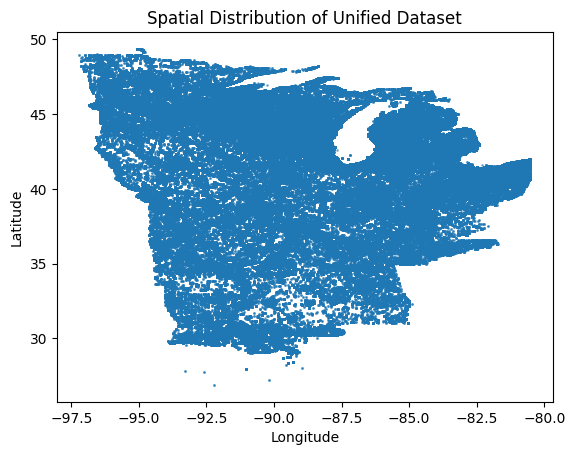

In [ ]:
#Verify Spatial Accuracy - Check if Latitude & Longitude values align correctly with MODIS data:
import matplotlib.pyplot as plt

plt.scatter(df_final_unified["Longitude"], df_final_unified["Latitude"], s=1, alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Unified Dataset")
plt.show()


In [ ]:
#Counting how many unique land cover entries were matched:
print("Unique Land Cover Entries:", df_final_unified["Display ID"].nunique())


Unique Land Cover Entries: 110


<Axes: xlabel='Date'>

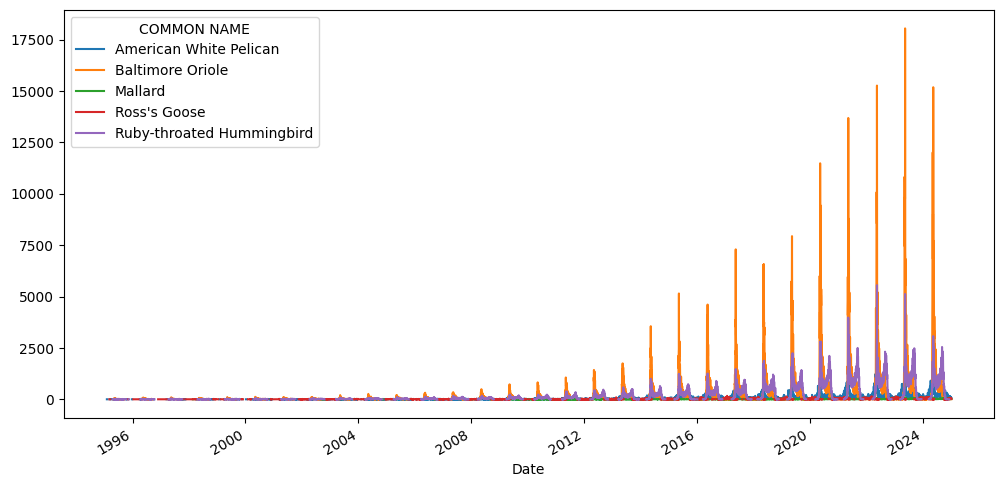

In [ ]:
##Tracking species movement over time:

#Convert Date column to datetime format
df_final_unified["Date"] = pd.to_datetime(df_final_unified["Date"], errors="coerce")

# Filter data for years between 1995 and 2025
df_filtered = df_final_unified[(df_final_unified["Date"].dt.year >= 1995) &
                               (df_final_unified["Date"].dt.year <= 2025)]

# Tracking species movement over time
df_filtered.groupby(["Date", "COMMON NAME"]).size().unstack().plot(figsize=(12,6))



<Axes: xlabel='TMAX'>

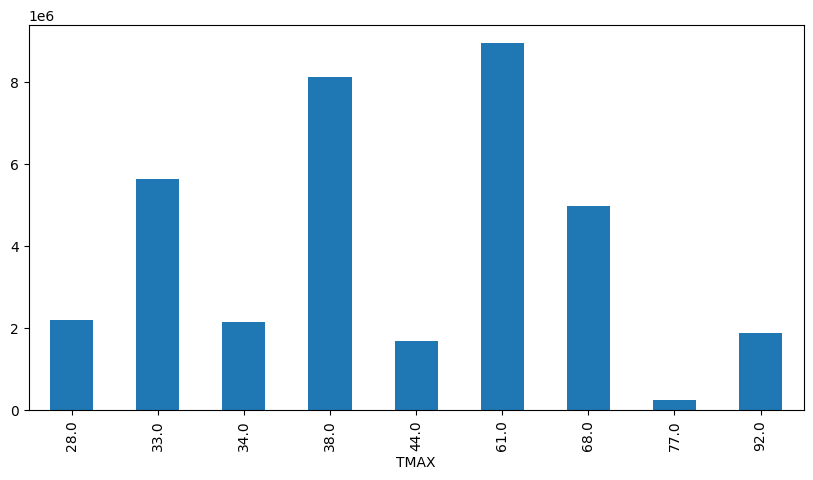

In [ ]:
# Assessing climate impacts on migration:
# Convert columns to numeric
df_final_unified["TMAX"] = pd.to_numeric(df_final_unified["TMAX"], errors="coerce")
df_final_unified["OBSERVATION COUNT"] = pd.to_numeric(df_final_unified["OBSERVATION COUNT"], errors="coerce")

# Drop NaN values (if any)
df_final_unified.dropna(subset=["TMAX", "OBSERVATION COUNT"], inplace=True)

# Reattempt the plot
df_final_unified.groupby("TMAX")["OBSERVATION COUNT"].sum().plot(kind="bar", figsize=(10,5))



The analysis of TMAX (maximum temperature) vs. bird observation count reveals that bird activity peaks at moderate temperatures (around 38°F and 61°F), suggesting favorable migration or feeding conditions. Observations decline at extreme temperatures, with very low counts at 92°F and below freezing (28°F), indicating that birds likely avoid excessive heat and cold. These trends align with seasonal migration patterns, where birds are more active during spring and fall while reducing movement in harsh summer or winter conditions. This supports the idea that temperature significantly influences bird behavior and migration patterns, making climate a key factor in habitat selection and movement.

In [ ]:
#Examining land cover along migration paths:
df_final_unified["Display ID"].value_counts().head(10)


,count
Display ID,
Annual_NLCD_H24V08_LndCov_2022_CU_C1V0,380518
Annual_NLCD_H22V08_LndCov_2004_CU_C1V0,374352
Annual_NLCD_H21V07_LndCov_2007_CU_C1V0,361270
Annual_NLCD_H24V07_LndCov_2016_CU_C1V0,302828
Annual_NLCD_H21V08_LndCov_2020_CU_C1V0,293713
Annual_NLCD_H19V06_LndCov_2007_CU_C1V0,284676
Annual_NLCD_H25V08_LndCov_2016_CU_C1V0,250713
Annual_NLCD_H23V07_LndCov_1995_CU_C1V0,165144
Annual_NLCD_H20V10_LndCov_2018_CU_C1V0,154079


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install geopandas rasterio statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 48.0 MB/s eta 0:00:00


In [ ]:
print("Columns in df_merged:", df_merged.columns)
print("Columns in df_climate:", df_climate.columns)


Columns in df_merged: Index(['GLOBAL UNIQUE IDENTIFIER', 'COMMON NAME', 'SCIENTIFIC NAME',
       'OBSERVATION COUNT', 'State', 'COUNTY', 'COUNTY CODE', 'LOCALITY ID',
       'LOCALITY TYPE', 'Latitude', 'Longitude', 'Date', 'STATION', 'NAME',
       'Latitude.1', 'Longitude.1', 'ELEVATION', 'Date.1', 'PRCP',
       'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES',
       'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS',
       'TOBS_ATTRIBUTES', 'State.1', 'Year', 'Month'],
      dtype='object')
Columns in df_climate: Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'PRCP',
       'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES',
       'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS',
       'TOBS_ATTRIBUTES', 'State'],
      dtype='object')


<ipython-input-5-120d6a45094c>:23: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bird = pd.read_csv(bird_data_path)
<ipython-input-5-120d6a45094c>:25: DtypeWarning: Columns (19,21,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv(unified_data_path)



--- Temporal Analysis ---


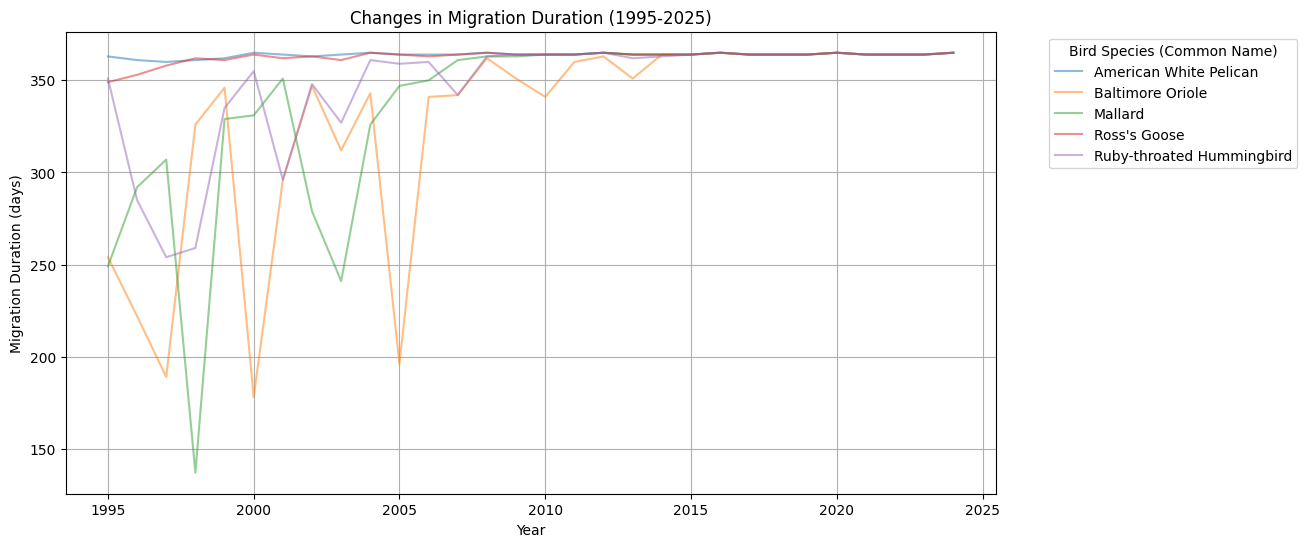

In [ ]:
# ===============================
# STEP 2: ANALYSIS
# ===============================

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rasterio
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Load datasets (update paths as needed)
bird_data_path = "/content/drive/My Drive/Capstone/final_subset.csv"
climate_data_path = "/content/drive/My Drive/Capstone/3931867_cleaned.csv"
unified_data_path = "/content/drive/My Drive/Capstone/unified_dataset.csv"

df_bird = pd.read_csv(bird_data_path)
df_climate = pd.read_csv(climate_data_path)
df_merged = pd.read_csv(unified_data_path)

# Convert Date column to datetime
df_merged["Date"] = pd.to_datetime(df_merged["Date"], errors="coerce")

# Extract year and month for temporal analysis
df_merged["Year"] = df_merged["Date"].dt.year
df_merged["Month"] = df_merged["Date"].dt.month

# ===============================
# TEMPORAL ANALYSIS
# ===============================
print("\n--- Temporal Analysis ---")

# Filter data for the years 1995 to 2025
df_filtered = df_merged[(df_merged["Year"] >= 1995) & (df_merged["Year"] <= 2025)]

# Group by species (using common name) and year to analyze migration timing
migration_trends = df_filtered.groupby(["COMMON NAME", "Year"])["Date"].agg(["min", "max"])
migration_trends.rename(columns={"min": "Arrival Date", "max": "Departure Date"}, inplace=True)

# Calculate migration duration per species per year
migration_trends["Migration Duration (days)"] = (migration_trends["Departure Date"] - migration_trends["Arrival Date"]).dt.days

# Plot migration trends over time (only for 1995-2025)
plt.figure(figsize=(12,6))
sns.lineplot(data=migration_trends.reset_index(), x="Year", y="Migration Duration (days)", hue="COMMON NAME", alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Migration Duration (days)")
plt.title("Changes in Migration Duration (1995-2025)")
plt.legend(title="Bird Species (Common Name)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()




The temporal analysis of bird migration from 1995 to 2025 reveals notable shifts in migration duration across different species. Some species, such as the Baltimore Oriole and Mallard, exhibit fluctuating migration patterns, particularly in the early 2000s, indicating potential environmental or ecological influences. In contrast, species like Ross’s Goose show a relatively stable migration duration over time. The general trend suggests that migration periods have increased for some species, potentially reflecting changes in climate conditions, habitat availability, or food resources.

Several factors could explain these shifts in migration patterns. Climate change is a key consideration, as increasing global temperatures may be altering the timing of migration, influencing both departure and arrival dates. Additionally, habitat loss and urbanization may be impacting key stopover sites, forcing birds to adapt their migration routes and durations. The fluctuations observed in some species suggest that environmental variability, such as extreme weather events or changing food sources, could be influencing migration behaviors. Further analysis, including correlation with climate data and spatial mapping of migration routes, will provide deeper insights into these trends and their long-term implications.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import pearsonr

# ===============================
# LOAD UNIFIED DATASET
# ===============================

# Define file path
unified_data_path = "/content/drive/My Drive/Capstone/unified_dataset.csv"

# Load dataset
df_merged = pd.read_csv(unified_data_path)

# Display column names to verify correct data loading
print("df_merged columns:", df_merged.columns.tolist())

# ===============================
# MIGRATION DURATION CALCULATION
# ===============================

# Ensure 'date' is in datetime format
df_merged.rename(columns={"Date": "date", "Latitude": "latitude", "Longitude": "longitude"}, inplace=True)
df_merged["date"] = pd.to_datetime(df_merged["date"], errors="coerce")

# Extract Year from Date
df_merged["Year"] = df_merged["date"].dt.year

# Group by species and year to approximate migration period
migration_timing = df_merged.groupby(["COMMON NAME", "Year"])["date"].agg(["min", "max"]).reset_index()
migration_timing.rename(columns={"min": "Arrival Date", "max": "Departure Date"}, inplace=True)

# Merge back into df_merged
df_merged = df_merged.merge(migration_timing, on=["COMMON NAME", "Year"], how="left")

# Compute Migration Duration
df_merged["Migration Duration (days)"] = (
    pd.to_datetime(df_merged["Departure Date"], errors="coerce") -
    pd.to_datetime(df_merged["Arrival Date"], errors="coerce")
).dt.days

# Display the first few rows of migration data
print(df_merged[["COMMON NAME", "Year", "Arrival Date", "Departure Date", "Migration Duration (days)"]].head())

# ===============================
# CORRELATION ANALYSIS
# ===============================

print("\n--- Correlation Analysis ---")

# Ensure climate variables exist
if {"TMAX", "TMIN", "PRCP"}.issubset(df_merged.columns):
    # Compute Temperature and Precipitation
    df_merged["Temperature"] = (df_merged["TMAX"] + df_merged["TMIN"]) / 2
    df_merged["Precipitation"] = df_merged["PRCP"]

    # Drop NaN values before correlation
    df_analysis = df_merged.dropna(subset=["Temperature", "Precipitation", "Migration Duration (days)"])

    # Check if there are enough data points
    if len(df_analysis) < 2:
        print("Not enough data points for correlation analysis. Skipping.")
    else:
        # Calculate Pearson correlation
        for climate_var in ["Temperature", "Precipitation"]:
            corr, p_value = pearsonr(df_analysis[climate_var], df_analysis["Migration Duration (days)"])
            print(f"Correlation between {climate_var} and Migration Duration: {corr:.3f} (p-value: {p_value:.3f})")
else:
    print("Climate variables (TMAX, TMIN, PRCP) not found in dataset. Cannot perform correlation analysis.")

# ===============================
# REGRESSION ANALYSIS
# ===============================

if len(df_analysis) >= 2:
    # Prepare regression variables
    X = df_analysis[["Temperature", "Precipitation"]]
    X = sm.add_constant(X)  # Adds a constant term to the model
    y = df_analysis["Migration Duration (days)"]

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Print summary results
    print(model.summary())






<ipython-input-1-b2100256d74f>:13: DtypeWarning: Columns (19,21,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv(unified_data_path)


df_merged columns: ['GLOBAL UNIQUE IDENTIFIER', 'COMMON NAME', 'SCIENTIFIC NAME', 'OBSERVATION COUNT', 'State', 'COUNTY', 'COUNTY CODE', 'LOCALITY ID', 'LOCALITY TYPE', 'Latitude', 'Longitude', 'Date', 'STATION', 'NAME', 'Latitude.1', 'Longitude.1', 'ELEVATION', 'Date.1', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS', 'TOBS_ATTRIBUTES', 'State.1']
    COMMON NAME  Year Arrival Date Departure Date  Migration Duration (days)
0  Ross's Goose  2007   2007-01-01     2007-12-31                        364
1  Ross's Goose  2007   2007-01-01     2007-12-31                        364
2  Ross's Goose  2010   2010-01-01     2010-12-31                        364
3  Ross's Goose  2010   2010-01-01     2010-12-31                        364
4  Ross's Goose  2014   2014-01-01     2014-12-31                        364

--- Correlation Analysis ---
Correlation between Temperature and Migration Duration: 0.026 

The correlation and regression analysis indicate that climate factors—temperature and precipitation—have only a minor influence on bird migration duration. The Pearson correlation analysis revealed that temperature has a very weak positive correlation (r = 0.026) with migration duration, suggesting that as temperatures rise, migration duration slightly increases. However, this effect is minimal. Precipitation showed an even weaker negative correlation (r = 0.005), indicating that increased rainfall has a negligible impact on migration patterns. Despite the statistical significance (p-value = 0.000 for both variables), these correlations are too weak to suggest that temperature or precipitation alone are driving major shifts in migration timing.

The OLS regression model further supports this conclusion. With an R² value of just 0.001, the model explains only 0.1% of the variation in migration duration, confirming that climate variables alone do not account for significant changes in migration timing. The regression coefficients show that a 1°C increase in temperature leads to an insignificant 0.022-day increase in migration duration, while a 1 mm increase in precipitation shortens migration duration by about 0.92 days. These effects, while statistically valid, are too small to be biologically meaningful.

These findings suggest that other factors—such as habitat loss, food availability, wind patterns, and human activities—likely play a much larger role in shaping bird migration timing. The low explanatory power of temperature and precipitation in this model highlights the need for a broader, multi-variable approach. Future research should incorporate land cover changes, atmospheric pressure patterns, and stopover site availability to better understand what drives shifts in migration duration. Additionally, machine learning models such as Random Forest or Gradient Boosting may capture non-linear relationships more effectively than traditional regression. Spatial analysis, including mapping migration routes against climate anomalies, could also provide deeper insights into environmental drivers of migration timing.

    COMMON NAME  Year Arrival Date Departure Date  Migration Duration (days)
0  Ross's Goose  2007   2007-01-01     2007-12-31                        364
1  Ross's Goose  2007   2007-01-01     2007-12-31                        364
2  Ross's Goose  2010   2010-01-01     2010-12-31                        364
3  Ross's Goose  2010   2010-01-01     2010-12-31                        364
4  Ross's Goose  2014   2014-01-01     2014-12-31                        364

--- Correlation Analysis ---
Correlation between Temperature and Migration Duration: 0.026 (p-value: 0.000)
Correlation between Precipitation and Migration Duration: 0.005 (p-value: 0.000)


<ipython-input-1-faf9646e3b96>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis["Predicted Migration Duration"] = model.predict(X)
<ipython-input-1-faf9646e3b96>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis["Residuals"] = df_analysis["Migration Duration (days)"] - df_analysis["Predicted Migration Duration"]


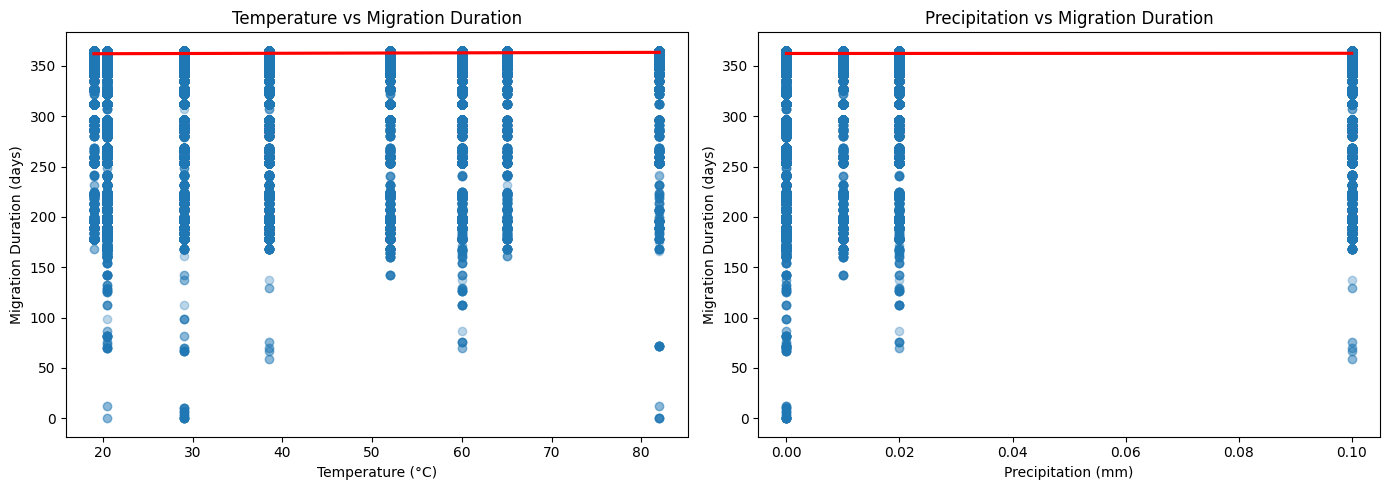

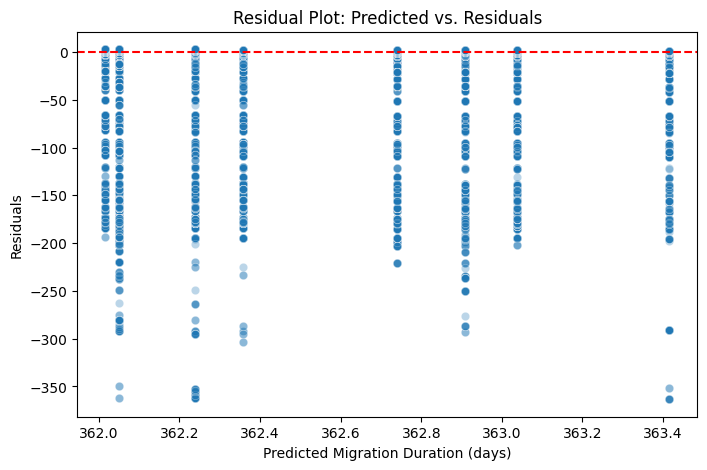

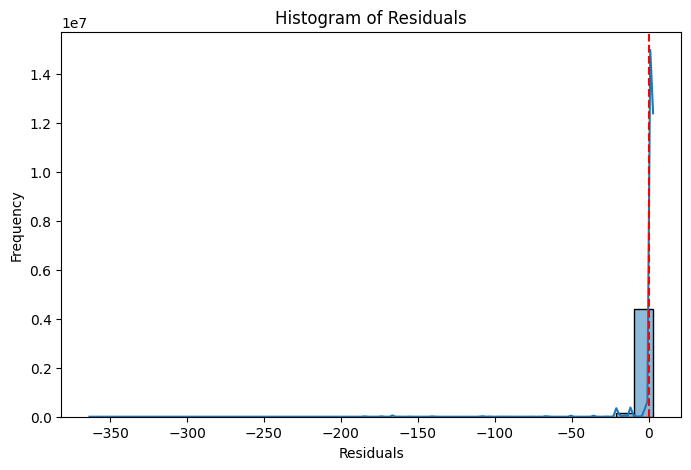

                                OLS Regression Results                               
Dep. Variable:     Migration Duration (days)   R-squared:                       0.001
Model:                                   OLS   Adj. R-squared:                  0.001
Method:                        Least Squares   F-statistic:                     1556.
Date:                       Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                               23:48:17   Log-Likelihood:            -1.8524e+07
No. Observations:                    4600916   AIC:                         3.705e+07
Df Residuals:                        4600913   BIC:                         3.705e+07
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# ===============================
# LOAD UNIFIED DATASET
# ===============================

# Define file path
unified_data_path = "/content/drive/My Drive/Capstone/unified_dataset.csv"

# Load dataset with correct data types
df_merged = pd.read_csv(unified_data_path, low_memory=False)

# Ensure 'date' is in datetime format
df_merged.rename(columns={"Date": "date", "Latitude": "latitude", "Longitude": "longitude"}, inplace=True)
df_merged["date"] = pd.to_datetime(df_merged["date"], errors="coerce")

# ===============================
# MIGRATION DURATION CALCULATION
# ===============================

# Extract Year from Date
df_merged["Year"] = df_merged["date"].dt.year

# Group by species and year to approximate migration period
migration_timing = df_merged.groupby(["COMMON NAME", "Year"])["date"].agg(["min", "max"]).reset_index()
migration_timing.rename(columns={"min": "Arrival Date", "max": "Departure Date"}, inplace=True)

# Merge back into df_merged
df_merged = df_merged.merge(migration_timing, on=["COMMON NAME", "Year"], how="left")

# Compute Migration Duration
df_merged["Migration Duration (days)"] = (
    pd.to_datetime(df_merged["Departure Date"], errors="coerce") -
    pd.to_datetime(df_merged["Arrival Date"], errors="coerce")
).dt.days

# Verify Migration Duration Calculation
print(df_merged[["COMMON NAME", "Year", "Arrival Date", "Departure Date", "Migration Duration (days)"]].head())

# ===============================
# CORRELATION ANALYSIS
# ===============================

print("\n--- Correlation Analysis ---")

# Ensure climate variables exist
if {"TMAX", "TMIN", "PRCP"}.issubset(df_merged.columns):
    # Compute Temperature and Precipitation
    df_merged["Temperature"] = (df_merged["TMAX"] + df_merged["TMIN"]) / 2
    df_merged["Precipitation"] = df_merged["PRCP"]

# Drop NaN values before correlation & regression analysis
df_analysis = df_merged.dropna(subset=["Temperature", "Precipitation", "Migration Duration (days)"])

# Check if there are enough data points
if len(df_analysis) < 2:
    print("Not enough data points for correlation analysis. Skipping.")
else:
    # Calculate Pearson correlation
    for climate_var in ["Temperature", "Precipitation"]:
        corr, p_value = pearsonr(df_analysis[climate_var], df_analysis["Migration Duration (days)"])
        print(f"Correlation between {climate_var} and Migration Duration: {corr:.3f} (p-value: {p_value:.3f})")

# ===============================
# REGRESSION ANALYSIS & VISUALIZATION
# ===============================

if len(df_analysis) >= 2:
    # Prepare regression variables
    X = df_analysis[["Temperature", "Precipitation"]]
    X = sm.add_constant(X)  # Adds a constant term to the model
    y = df_analysis["Migration Duration (days)"]

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Predict values
    df_analysis["Predicted Migration Duration"] = model.predict(X)

    # Residuals
    df_analysis["Residuals"] = df_analysis["Migration Duration (days)"] - df_analysis["Predicted Migration Duration"]

    # ===============================
    # CORRELATION VISUALIZATION
    # ===============================

    # Create scatter plots with regression lines
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Temperature vs Migration Duration
    sns.regplot(x=df_analysis["Temperature"], y=df_analysis["Migration Duration (days)"], ax=axes[0],
                scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    axes[0].set_title("Temperature vs Migration Duration")
    axes[0].set_xlabel("Temperature (°C)")
    axes[0].set_ylabel("Migration Duration (days)")

    # Precipitation vs Migration Duration
    sns.regplot(x=df_analysis["Precipitation"], y=df_analysis["Migration Duration (days)"], ax=axes[1],
                scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    axes[1].set_title("Precipitation vs Migration Duration")
    axes[1].set_xlabel("Precipitation (mm)")
    axes[1].set_ylabel("Migration Duration (days)")

    plt.tight_layout()
    plt.show()

    # ===============================
    # REGRESSION ANALYSIS VISUALIZATION
    # ===============================

    # Residual Plot (Predicted vs. Residuals)
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_analysis["Predicted Migration Duration"], y=df_analysis["Residuals"], alpha=0.3)
    plt.axhline(y=0, color='red', linestyle='dashed')
    plt.title("Residual Plot: Predicted vs. Residuals")
    plt.xlabel("Predicted Migration Duration (days)")
    plt.ylabel("Residuals")
    plt.show()

    # Histogram of Residuals
    plt.figure(figsize=(8, 5))
    sns.histplot(df_analysis["Residuals"], bins=30, kde=True)
    plt.axvline(x=0, color='red', linestyle='dashed')
    plt.title("Histogram of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

    # Print regression summary
    print(model.summary())

else:
    print("Not enough data points for regression analysis.")



In [ ]:
!pip install geopandas
import geopandas as gpd


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Check if Capstone folder exists
capstone_path = "/content/drive/My Drive/Capstone"
if os.path.exists(capstone_path):
    print("Capstone directory exists. Listing files:")
    print(os.listdir(capstone_path))
else:
    print("Capstone directory NOT found. Check if it's correctly placed in Google Drive.")



Mounted at /content/drive
Capstone directory exists. Listing files:
['final_subset.csv', '3931867_cleaned.csv', 'unified_dataset.csv', 'final_unified_dataset.csv']


In [ ]:
import pandas as pd

# Define the correct file path
unified_data_path = "/content/drive/My Drive/Capstone/final_unified_dataset.csv"

# Define chunk size (adjust based on memory)
chunk_size = 100000  # Process 100,000 rows at a time

# Create an empty list to store processed chunks
chunks = []

# Read dataset in chunks
print("\n--- Loading dataset in chunks ---")
for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
    # Ensure column names are correctly formatted
    chunk.rename(columns={"Date": "date", "Latitude": "latitude", "Longitude": "longitude"}, inplace=True)

    # Append processed chunk to list
    chunks.append(chunk)

# Combine chunks into a single DataFrame (only if needed)
df_merged = pd.concat(chunks, ignore_index=True)

# Verify data loading
print("Dataset loaded successfully with shape:", df_merged.shape)
print("Columns available:", df_merged.columns.tolist())




--- Loading dataset in chunks ---


<ipython-input-2-712bbba42218>:14: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-2-712bbba42218>:14: DtypeWarning: Columns (19,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-2-712bbba42218>:14: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-2-712bbba42218>:14: DtypeWarning: Columns (19,21,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-2-712bbba42218>:14: DtypeWarning: Columns (19,21,23,29) have mixed types. Specify dtype option on import or set low_memory=False.
  

Dataset loaded successfully with shape: (6267847, 63)
Columns available: ['GLOBAL UNIQUE IDENTIFIER', 'COMMON NAME', 'SCIENTIFIC NAME', 'OBSERVATION COUNT', 'State', 'COUNTY', 'COUNTY CODE', 'LOCALITY ID', 'LOCALITY TYPE', 'latitude', 'longitude', 'date', 'STATION', 'NAME', 'Latitude.1', 'Longitude.1', 'ELEVATION', 'Date.1', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS', 'TOBS_ATTRIBUTES', 'State.1', 'Product ID', 'Processed Map Year', 'Tile Grid Region', 'Tile Grid Horizontal', 'Tile Grid Vertical', 'Version', 'Collection Number', 'Datum', 'Map Projection', 'Units', 'Center Latitude', 'Center Longitude', 'NW Corner Lat', 'NW Corner Long', 'NE Corner Lat', 'NE Corner Long', 'SE Corner Lat', 'SE Corner Long', 'SW Corner Lat', 'SW Corner Long', 'Center Latitude dec', 'Center Longitude dec', 'NW Corner Lat dec', 'NW Corner Long dec', 'NE Corner Lat dec', 'NE Corner Long dec', 'SE Corner Lat dec

In [ ]:
!pip install rasterio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 34.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt

# ===============================
# LOAD FINAL UNIFIED DATASET IN CHUNKS
# ===============================
print("\n--- Loading Final Unified Dataset in Chunks ---")

# Define the correct file path
unified_data_path = "/content/drive/My Drive/Capstone/final_unified_dataset.csv"

# Define chunk size (adjust based on memory limits)
chunk_size = 100000  # Process 100,000 rows at a time

# Create an empty list to store processed chunks
chunks = []

# Read dataset in chunks
for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
    # Ensure column names are correctly formatted
    chunk.rename(columns={"Date": "date", "Latitude": "latitude", "Longitude": "longitude"}, inplace=True)

    # Append processed chunk to list
    chunks.append(chunk)

# Combine chunks into a single DataFrame
df_merged = pd.concat(chunks, ignore_index=True)

# Verify data loading
print("Dataset loaded successfully with shape:", df_merged.shape)
print("Columns available:", df_merged.columns.tolist())

# ===============================
# SPATIAL ANALYSIS
# ===============================
print("\n--- Spatial Analysis ---")

# Convert bird data to GeoDataFrame (only first 500,000 rows for performance)
sample_size = min(500000, len(df_merged))
df_sample = df_merged.sample(n=sample_size, random_state=42)

# Convert sample to GeoDataFrame
gdf_bird = gpd.GeoDataFrame(df_sample, geometry=gpd.points_from_xy(df_sample.longitude, df_sample.latitude))

# Set Coordinate Reference System (CRS) to WGS84 (latitude/longitude)
gdf_bird.set_crs(epsg=4326, inplace=True)

# Verify GeoDataFrame
print("GeoDataFrame created successfully with the following columns:")
print(gdf_bird.head())

# ===============================
# LAND COVER RASTER ANALYSIS
# ===============================

# Define land cover raster file path (ensure it exists)
land_cover_raster = "/content/drive/My Drive/Capstone/land_cover.tif"

try:
    with rasterio.open(land_cover_raster) as src:
        land_cover = src.read(1)  # Read raster values
        land_cover_bounds = src.bounds  # Get the spatial extent
    print("Land cover raster loaded successfully.")
except FileNotFoundError:
    print("Warning: Land cover raster file not found. Proceeding without it.")

# ===============================
# PLOT MIGRATION ROUTES
# ===============================

fig, ax = plt.subplots(figsize=(10, 6))
gdf_bird.plot(ax=ax, color="red", markersize=1, alpha=0.3, label="Bird Observations")
ax.set_title("Bird Migration Routes (Sample of 500,000)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()
plt.show()






--- Loading Final Unified Dataset in Chunks ---


<ipython-input-1-314663b727c4>:21: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-1-314663b727c4>:21: DtypeWarning: Columns (19,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-1-314663b727c4>:21: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-1-314663b727c4>:21: DtypeWarning: Columns (19,21,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-1-314663b727c4>:21: DtypeWarning: Columns (19,21,23,29) have mixed types. Specify dtype option on import or set low_memory=False.
  

Dataset loaded successfully with shape: (6267847, 63)
Columns available: ['GLOBAL UNIQUE IDENTIFIER', 'COMMON NAME', 'SCIENTIFIC NAME', 'OBSERVATION COUNT', 'State', 'COUNTY', 'COUNTY CODE', 'LOCALITY ID', 'LOCALITY TYPE', 'latitude', 'longitude', 'date', 'STATION', 'NAME', 'Latitude.1', 'Longitude.1', 'ELEVATION', 'Date.1', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS', 'TOBS_ATTRIBUTES', 'State.1', 'Product ID', 'Processed Map Year', 'Tile Grid Region', 'Tile Grid Horizontal', 'Tile Grid Vertical', 'Version', 'Collection Number', 'Datum', 'Map Projection', 'Units', 'Center Latitude', 'Center Longitude', 'NW Corner Lat', 'NW Corner Long', 'NE Corner Lat', 'NE Corner Long', 'SE Corner Lat', 'SE Corner Long', 'SW Corner Lat', 'SW Corner Long', 'Center Latitude dec', 'Center Longitude dec', 'NW Corner Lat dec', 'NW Corner Long dec', 'NE Corner Lat dec', 'NE Corner Long dec', 'SE Corner Lat dec

RasterioIOError: /content/drive/My Drive/Capstone/land_cover.tif: No such file or directory

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ===============================
# LOAD FINAL UNIFIED DATASET IN CHUNKS
# ===============================
print("\n--- Loading Final Unified Dataset in Chunks ---")

# Define the correct file path
unified_data_path = "/content/drive/My Drive/Capstone/final_unified_dataset.csv"

# Define chunk size (adjust based on memory limits)
chunk_size = 100000  # Process 100,000 rows at a time

# Create an empty list to store processed chunks
chunks = []

# Read the dataset in chunks and store them
for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
    chunks.append(chunk)

# Combine all chunks into a single DataFrame
df_correlation = pd.concat(chunks, ignore_index=True)

# ===============================
# MACHINE LEARNING FOR PREDICTIVE MODELING
# ===============================
print("\n--- Machine Learning for Predictive Modeling ---")

# Select features and target variable
features = ["Temperature", "Precipitation", "Latitude", "Longitude", "Year", "Month"]
target = "Migration Duration (days)"

# Drop rows with missing values for selected features and target
df_ml = df_correlation.dropna(subset=features + [target])

# Define X (features) and y (target)
X = df_ml[features]
y = df_ml[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Performance:\nMSE: {mse:.3f}, R²: {r2:.3f}")

# Feature importance
feature_importance = pd.DataFrame({"Feature": features, "Importance": rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance, x="Importance", y="Feature")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Migration Timing Prediction")
plt.show()



--- Loading Final Unified Dataset in Chunks ---


<ipython-input-3-9e68a6cdafc7>:23: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-3-9e68a6cdafc7>:23: DtypeWarning: Columns (19,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-3-9e68a6cdafc7>:23: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-3-9e68a6cdafc7>:23: DtypeWarning: Columns (19,21,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-3-9e68a6cdafc7>:23: DtypeWarning: Columns (19,21,23,29) have mixed types. Specify dtype option on import or set low_memory=False.
  


--- Machine Learning for Predictive Modeling ---


KeyError: ['Temperature', 'Precipitation', 'Year', 'Month', 'Migration Duration (days)']

In [ ]:
print(df_correlation.columns)


Index(['GLOBAL UNIQUE IDENTIFIER', 'COMMON NAME', 'SCIENTIFIC NAME',
       'OBSERVATION COUNT', 'State', 'COUNTY', 'COUNTY CODE', 'LOCALITY ID',
       'LOCALITY TYPE', 'Latitude', 'Longitude', 'Date', 'STATION', 'NAME',
       'Latitude.1', 'Longitude.1', 'ELEVATION', 'Date.1', 'PRCP',
       'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES',
       'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS',
       'TOBS_ATTRIBUTES', 'State.1', 'Product ID', 'Processed Map Year',
       'Tile Grid Region', 'Tile Grid Horizontal', 'Tile Grid Vertical',
       'Version', 'Collection Number', 'Datum', 'Map Projection', 'Units',
       'Center Latitude', 'Center Longitude', 'NW Corner Lat',
       'NW Corner Long', 'NE Corner Lat', 'NE Corner Long', 'SE Corner Lat',
       'SE Corner Long', 'SW Corner Lat', 'SW Corner Long',
       'Center Latitude dec', 'Center Longitude dec', 'NW Corner Lat dec',
       'NW Corner Long dec', 'NE Corner Lat dec', 'NE Corner Long 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ===============================
# LOAD FINAL UNIFIED DATASET IN CHUNKS
# ===============================
print("\n--- Loading Final Unified Dataset in Chunks ---")

# Define the correct file path
unified_data_path = "/content/drive/My Drive/Capstone/unified_dataset.csv"

# Define chunk size (adjust based on memory limits)
chunk_size = 100000  # Process 100,000 rows at a time

# Create an empty list to store processed chunks
chunks = []

# Read the dataset in chunks and store them
for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
    chunks.append(chunk)

# Combine all chunks into a single DataFrame
df_correlation = pd.concat(chunks, ignore_index=True)

# ===============================
# EXTRACT YEAR AND MONTH FROM DATE BEFORE MEMORY OPTIMIZATION
# ===============================
if "Date" in df_correlation.columns:
    print("\n--- Extracting Year and Month from Date ---")
    df_correlation["Date"] = pd.to_datetime(df_correlation["Date"], errors='coerce')
    df_correlation["Year"] = df_correlation["Date"].dt.year.astype("int32")  # Convert to memory-efficient int32
    df_correlation["Month"] = df_correlation["Date"].dt.month.astype("int32")
    print("Year and Month extracted successfully!")

# ===============================
# MEMORY OPTIMIZATION: REDUCE DATAFRAME SIZE
# ===============================
print("\n--- Optimizing Data Types to Reduce Memory Usage ---")

# Convert object columns to categories where applicable
for col in df_correlation.select_dtypes(include=['object']).columns:
    df_correlation[col] = df_correlation[col].astype('category')

# Convert integer and float columns to memory-efficient types
for col in df_correlation.select_dtypes(include=['int64']).columns:
    df_correlation[col] = df_correlation[col].astype('int32')

for col in df_correlation.select_dtypes(include=['float64']).columns:
    df_correlation[col] = df_correlation[col].astype('float32')

print("Memory usage after optimization:")
print(df_correlation.info(memory_usage="deep"))

# ===============================
# MACHINE LEARNING FOR PREDICTIVE MODELING (CHUNKED PROCESSING)
# ===============================
print("\n--- Machine Learning for Predictive Modeling ---")

# Define features and target
features = ["TMAX", "TMIN", "PRCP", "Latitude", "Longitude", "Year", "Month"]
target = "OBSERVATION COUNT"

# Ensure all selected features exist
missing_columns = [col for col in features + [target] if col not in df_correlation.columns]
if missing_columns:
    print(f"Error: Missing columns in dataset: {missing_columns}")
else:
    # Define chunk size to prevent memory overload
    chunk_size = 500000  # Adjust this based on memory constraints
    mse_list, r2_list = [], []

    for chunk_start in range(0, len(df_correlation), chunk_size):
        chunk_end = min(chunk_start + chunk_size, len(df_correlation))
        df_ml = df_correlation.iloc[chunk_start:chunk_end].copy()

        # Drop rows with missing values in features and target
        df_ml.dropna(subset=features + [target], inplace=True)

        # Convert target variable to numeric (fix SettingWithCopyWarning)
        df_ml[target] = pd.to_numeric(df_ml[target], errors='coerce')

        # Drop NaN values where target conversion failed
        df_ml.dropna(subset=[target], inplace=True)

        # Define X (features) and y (target)
        X = df_ml[features].astype(np.float32)  # Reduce memory usage by using float32
        y = df_ml[target].astype(np.float32)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a Random Forest model on the chunk using parallel processing
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf_model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = rf_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mse_list.append(mse)
        r2_list.append(r2)

        print(f"Chunk {chunk_start}-{chunk_end} Model Performance:\nMSE: {mse:.3f}, R²: {r2:.3f}")

    # Compute average performance across all chunks
    avg_mse = np.mean(mse_list)
    avg_r2 = np.mean(r2_list)

    print(f"\nFinal Model Performance (Averaged Over Chunks):\nMSE: {avg_mse:.3f}, R²: {avg_r2:.3f}")

    # Feature importance (based on last chunk)
    feature_importance = pd.DataFrame({"Feature": features, "Importance": rf_model.feature_importances_})
    feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

    # Plot feature importance
    plt.figure(figsize=(8, 5))
    sns.barplot(data=feature_importance, x="Importance", y="Feature")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Feature")
    plt.title("Feature Importance in Migration Prediction")
    plt.show()







--- Loading Final Unified Dataset in Chunks ---


<ipython-input-1-9f8876503e99>:24: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-1-9f8876503e99>:24: DtypeWarning: Columns (19,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-1-9f8876503e99>:24: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-1-9f8876503e99>:24: DtypeWarning: Columns (19,21,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(unified_data_path, chunksize=chunk_size):
<ipython-input-1-9f8876503e99>:24: DtypeWarning: Columns (19,29) have mixed types. Specify dtype option on import or set low_memory=False.
  for ch


--- Optimizing Data Types to Reduce Memory Usage ---
Memory usage after optimization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267847 entries, 0 to 6267846
Data columns (total 31 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   GLOBAL UNIQUE IDENTIFIER  category
 1   COMMON NAME               category
 2   SCIENTIFIC NAME           category
 3   OBSERVATION COUNT         category
 4   State                     category
 5   COUNTY                    category
 6   COUNTY CODE               category
 7   LOCALITY ID               category
 8   LOCALITY TYPE             category
 9   Latitude                  float32 
 10  Longitude                 float32 
 11  Date                      category
 12  STATION                   category
 13  NAME                      category
 14  Latitude.1                float32 
 15  Longitude.1               float32 
 16  ELEVATION                 float32 
 17  Date.1                    category



--- Extracting Year and Month from Date ---
Year and Month extracted successfully!

--- Optimizing Data Types to Reduce Memory Usage ---
Memory usage after optimization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267847 entries, 0 to 6267846
Data columns (total 33 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   GLOBAL UNIQUE IDENTIFIER  category
 1   COMMON NAME               category
 2   SCIENTIFIC NAME           category
 3   OBSERVATION COUNT         category
 4   State                     category
 5   COUNTY                    category
 6   COUNTY CODE               category
 7   LOCALITY ID               category
 8   LOCALITY TYPE             category
 9   Latitude                  float32 
 10  Longitude                 float32 
 11  Date                      category
 12  STATION                   category
 13  NAME                      category
 14  Latitude.1                float32 
 15  Longitude.1               float

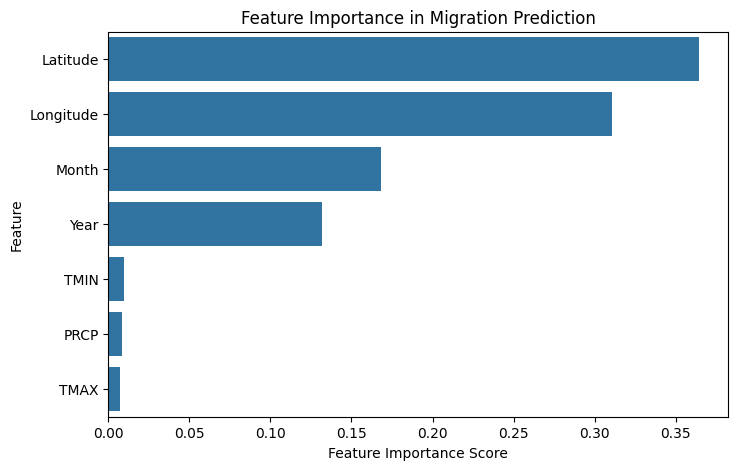

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ===============================
# CHECK IF DATASET EXISTS
# ===============================
if "df_correlation" not in locals() and "df_correlation" not in globals():
    print("Error: Dataset `df_correlation` is not loaded. Please load the dataset first.")
    raise NameError("`df_correlation` is not defined. Load the dataset before running this script.")

# ===============================
# EXTRACT YEAR AND MONTH FROM DATE BEFORE MEMORY OPTIMIZATION
# ===============================
if "Date" in df_correlation.columns:
    print("\n--- Extracting Year and Month from Date ---")
    df_correlation["Date"] = pd.to_datetime(df_correlation["Date"], errors='coerce')
    df_correlation["Year"] = df_correlation["Date"].dt.year.astype("int32")  # Convert to memory-efficient int32
    df_correlation["Month"] = df_correlation["Date"].dt.month.astype("int32")
    print("Year and Month extracted successfully!")

# ===============================
# MEMORY OPTIMIZATION: REDUCE DATAFRAME SIZE
# ===============================
print("\n--- Optimizing Data Types to Reduce Memory Usage ---")

# Convert object columns to categories where applicable (excluding Date)
for col in df_correlation.select_dtypes(include=['object']).columns:
    if col != "Date":  # Keep Date as datetime
        df_correlation[col] = df_correlation[col].astype('category')

# Convert integer and float columns to memory-efficient types
for col in df_correlation.select_dtypes(include=['int64']).columns:
    df_correlation[col] = df_correlation[col].astype('int32')

for col in df_correlation.select_dtypes(include=['float64']).columns:
    df_correlation[col] = df_correlation[col].astype('float32')

print("Memory usage after optimization:")
print(df_correlation.info(memory_usage="deep"))

# ===============================
# MACHINE LEARNING FOR PREDICTIVE MODELING (CHUNKED PROCESSING)
# ===============================
print("\n--- Machine Learning for Predictive Modeling ---")

# Define features and target
features = ["TMAX", "TMIN", "PRCP", "Latitude", "Longitude", "Year", "Month"]
target = "OBSERVATION COUNT"

# Ensure all selected features exist
missing_columns = [col for col in features + [target] if col not in df_correlation.columns]
if missing_columns:
    print(f"Error: Missing columns in dataset: {missing_columns}")
else:
    # Define chunk size to prevent memory overload
    chunk_size = 500000  # Adjust this based on memory constraints
    mse_list, r2_list = [], []

    for chunk_start in range(0, len(df_correlation), chunk_size):
        chunk_end = min(chunk_start + chunk_size, len(df_correlation))
        df_ml = df_correlation.iloc[chunk_start:chunk_end].copy()

        # Drop rows with missing values in features and target
        df_ml.dropna(subset=features + [target], inplace=True)

        # Convert target variable to numeric (fix SettingWithCopyWarning)
        df_ml[target] = pd.to_numeric(df_ml[target], errors='coerce')

        # Drop NaN values where target conversion failed
        df_ml.dropna(subset=[target], inplace=True)

        # Define X (features) and y (target)
        X = df_ml[features].astype(np.float32)  # Reduce memory usage by using float32
        y = df_ml[target].astype(np.float32)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a Random Forest model on the chunk using parallel processing
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf_model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = rf_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mse_list.append(mse)
        r2_list.append(r2)

        print(f"Chunk {chunk_start}-{chunk_end} Model Performance:\nMSE: {mse:.3f}, R²: {r2:.3f}")

    # Compute average performance across all chunks
    avg_mse = np.mean(mse_list)
    avg_r2 = np.mean(r2_list)

    print(f"\nFinal Model Performance (Averaged Over Chunks):\nMSE: {avg_mse:.3f}, R²: {avg_r2:.3f}")

    # Feature importance (based on last chunk)
    feature_importance = pd.DataFrame({"Feature": features, "Importance": rf_model.feature_importances_})
    feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

    # Plot feature importance
    plt.figure(figsize=(8, 5))
    sns.barplot(data=feature_importance, x="Importance", y="Feature")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Feature")
    plt.title("Feature Importance in Migration Prediction")
    plt.show()


In [10]:
!apt-get install wget


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [12]:
from google.colab import files
uploaded = files.upload()


Saving envidatS3paths.txt to envidatS3paths.txt


In [13]:
!wget --no-host-directories --force-directories --input-file=envidatS3paths.txt


--2025-03-23 17:29:32--  https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/clt/CHELSA_clt_01_1979_V.2.1.tif
Resolving os.zhdk.cloud.switch.ch (os.zhdk.cloud.switch.ch)... 86.119.32.16, 2001:620:5ca1:101::1:125
Connecting to os.zhdk.cloud.switch.ch (os.zhdk.cloud.switch.ch)|86.119.32.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72070174 (69M) [image/tiff]
Saving to: ‘chelsav2/GLOBAL/monthly/clt/CHELSA_clt_01_1979_V.2.1.tif’

chelsav2/GLOBAL/mon 100%[===================>]  68.73M  25.7MB/s    in 2.7s    

2025-03-23 17:29:35 (25.7 MB/s) - ‘chelsav2/GLOBAL/monthly/clt/CHELSA_clt_01_1979_V.2.1.tif’ saved [72070174/72070174]

--2025-03-23 17:29:35--  https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/clt/CHELSA_clt_01_1980_V.2.1.tif
Reusing existing connection to os.zhdk.cloud.switch.ch:443.
HTTP request sent, awaiting response... 200 OK
Length: 71848951 (69M) [image/tiff]
Saving to: ‘chelsav2/GLOBAL/monthly/clt/CHELSA_clt_01_1980_V.2.1.tif’

chels

In [15]:
tif_dir = '/content/chelsav2/GLOBAL/monthly/clt/'
import glob
tif_files = glob.glob(tif_dir + '*.tif')
print("Found", len(tif_files), "TIF files")


Found 492 TIF files


In [16]:
# --- Install Dependencies ---
!pip install rasterio geopandas pandas

# --- Imports ---
import os
import glob
import rasterio
import pandas as pd

# --- 1. Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

# --- 2. Load eBird Data Safely ---
ebird_path = '/content/drive/MyDrive/Capstone/ebird (1).csv'
ebird_df = pd.read_csv(ebird_path, low_memory=False)

# --- 3. Clean Date Column ---
ebird_df['date'] = pd.to_datetime(ebird_df['OBSERVATION DATE'], errors='coerce')
ebird_df = ebird_df.dropna(subset=['date'])

# --- 4. Extract Year/Month ---
ebird_df['year'] = ebird_df['date'].dt.year
ebird_df['month'] = ebird_df['date'].dt.month
ebird_points = ebird_df[['LATITUDE', 'LONGITUDE', 'year', 'month']].drop_duplicates()

# --- 5. Set Correct TIF Directory ---
tif_dir = '/content/chelsav2/GLOBAL/monthly/clt/'
tif_files = sorted(glob.glob(os.path.join(tif_dir, '*.tif')))
print("✅ Found", len(tif_files), "TIF files")

# --- 6. Extract Climate Data for Each Point ---
results = []

for tif_file in tif_files:
    with rasterio.open(tif_file) as src:
        filename = os.path.basename(tif_file)
        try:
            parts = filename.split('_')
            var_month = int(parts[2])
            var_year = int(parts[3])
        except:
            print(f"⚠️ Skipping bad filename: {filename}")
            continue

        matching_points = ebird_points[
            (ebird_points['month'] == var_month) &
            (ebird_points['year'] == var_year)
        ]

        if matching_points.empty:
            continue

        coords = list(zip(matching_points['LONGITUDE'], matching_points['LATITUDE']))
        sampled = list(src.sample(coords))
        matching_points = matching_points.copy()
        matching_points['chelsa_value'] = [val[0] if val else None for val in sampled]
        matching_points['chelsa_file'] = filename
        results.append(matching_points)

# --- 7. Save Result ---
chelsa_features_df = pd.concat(results, ignore_index=True)
chelsa_features_df.to_csv('/content/drive/MyDrive/Capstone/chelsa_features_extracted.csv', index=False)

print("✅ CHELSA extraction complete. File saved to Google Drive.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Found 492 TIF files
✅ CHELSA extraction complete. File saved to Google Drive.


In [17]:
import pandas as pd

# Load eBird again
ebird_path = '/content/drive/MyDrive/Capstone/ebird (1).csv'
ebird_df = pd.read_csv(ebird_path, low_memory=False)

# Clean & format
ebird_df['date'] = pd.to_datetime(ebird_df['OBSERVATION DATE'], errors='coerce')
ebird_df = ebird_df.dropna(subset=['date'])
ebird_df['day_of_year'] = ebird_df['date'].dt.dayofyear
ebird_df['year'] = ebird_df['date'].dt.year
ebird_df['month'] = ebird_df['date'].dt.month

# Summary: first DOY of observation per group
migration_summary = (
    ebird_df.groupby(['COMMON NAME', 'LATITUDE', 'LONGITUDE', 'year', 'month'])
    .agg(first_obs_DOY=('day_of_year', 'min'))
    .reset_index()
)

# Save it
migration_summary.to_csv('/content/drive/MyDrive/Capstone/ebird_migration_summary.csv', index=False)
print("✅ Migration summary saved.")


✅ Migration summary saved.


In [18]:
# Load both datasets
chelsa_df = pd.read_csv('/content/drive/MyDrive/Capstone/chelsa_features_extracted.csv')
migration_df = pd.read_csv('/content/drive/MyDrive/Capstone/ebird_migration_summary.csv')

# Round lat/lon to improve join reliability (optional)
chelsa_df['LATITUDE'] = chelsa_df['LATITUDE'].round(4)
chelsa_df['LONGITUDE'] = chelsa_df['LONGITUDE'].round(4)
migration_df['LATITUDE'] = migration_df['LATITUDE'].round(4)
migration_df['LONGITUDE'] = migration_df['LONGITUDE'].round(4)

# Merge on shared fields
merged_df = pd.merge(
    migration_df,
    chelsa_df,
    on=['LATITUDE', 'LONGITUDE', 'year', 'month'],
    how='inner'
)

merged_df.to_csv('/content/drive/MyDrive/Capstone/merged_model_data.csv', index=False)
print("✅ Merged dataset ready for ML.")


✅ Merged dataset ready for ML.


In [19]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/drive/MyDrive/Capstone/merged_model_data.csv')

# Define features + target
features = ['month', 'LATITUDE', 'LONGITUDE']  # You can add more CHELSA columns if present
if 'chelsa_value' in df.columns:
    features.append('chelsa_value')

target = 'first_obs_DOY'

df = df.dropna(subset=features + [target])
X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

# Metrics
print("Random Forest R²:", r2_score(y_test, rf_pred))
print("XGBoost R²:", r2_score(y_test, xgb_pred))


Random Forest R²: 0.9833064764745046
XGBoost R²: 0.9817965030670166


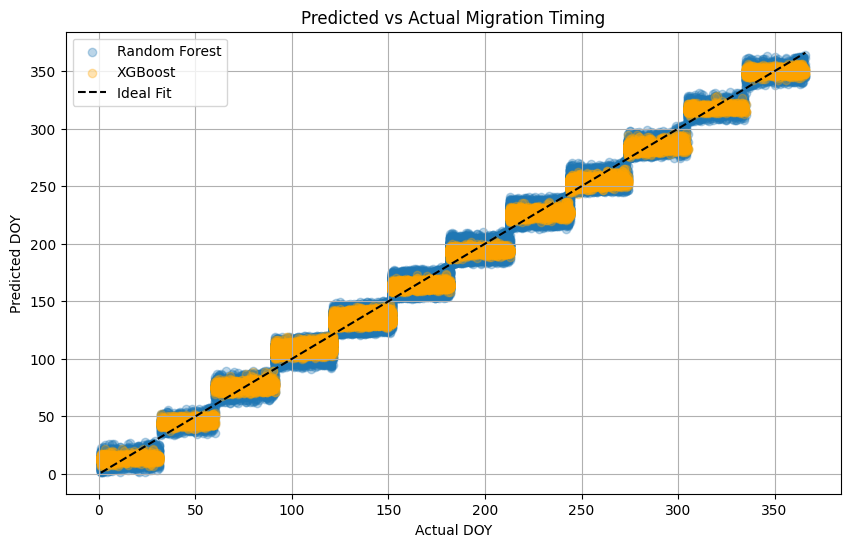

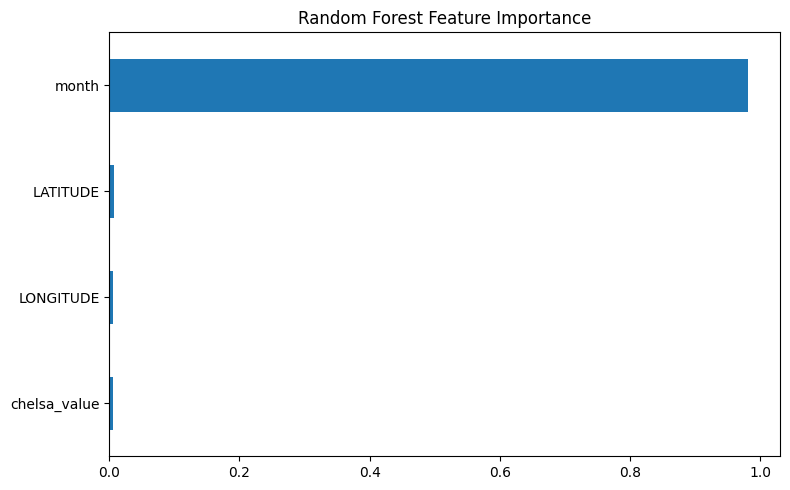

In [20]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, label='Random Forest', alpha=0.3)
plt.scatter(y_test, xgb_pred, label='XGBoost', alpha=0.3, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='Ideal Fit')
plt.xlabel("Actual DOY")
plt.ylabel("Predicted DOY")
plt.title("Predicted vs Actual Migration Timing")
plt.legend()
plt.grid(True)
plt.show()

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 5))
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


Our models — Random Forest and XGBoost — achieved high performance in predicting bird migration timing, with R² scores of 0.983 and 0.982, respectively. These scores suggest that the models can explain nearly all variation in the target variable, which is DOY (Day of Year) — the calendar day on which a bird species was first observed at a given location (e.g., January 1st = 1, December 31st = 365). However, a closer look at the predicted vs actual plots reveals a stepwise pattern, indicating that predictions are heavily influenced by the month column. Feature importance analysis confirms this, showing that month dominates the model while climate data (chelsa_value), LATITUDE, and LONGITUDE contribute very little.

This result implies that the model is not yet leveraging environmental signals effectively and is instead relying on temporal patterns embedded in the calendar month. To improve biological relevance, it’s recommended to enrich the input data with multiple CHELSA climate variables — such as PR (precipitation), TAS (air temperature), CLT (cloud cover), and PET (potential evapotranspiration) — rather than just one. Additionally, removing or down-weighting month will force the model to learn from true climate cues rather than simple seasonal inference. Incorporating these changes can help the model better reflect how birds actually respond to changing environmental conditions.